In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import re
from bs4 import BeautifulSoup

In [27]:
df=pd.read_csv('train.csv')
df.head()
ndf=df.sample(30000,random_state=2)
ndf.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [28]:
def preprocessing(q):
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
        "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
        "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    q_decontract=[]
    for word in q.split():
        if word in contractions:
            q_decontract.append(word)
    q=' '.join(q_decontract)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()
    return q

ndf.question1=ndf.question1.apply(preprocessing)             
ndf.question2=ndf.question2.apply(preprocessing)

'i have was not'

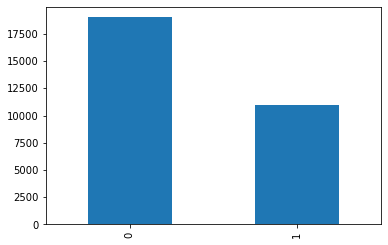

In [29]:
ndf.is_duplicate.value_counts().plot(kind='bar')
preprocessing("I've already! wasn't <b>done</b>?")

preprocessing("I've already! wasn't <b>done</b>?")

In [38]:
quid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('unique',np.unique(quid).shape[0])
quid.value_counts()

unique 537933


2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Length: 537933, dtype: int64

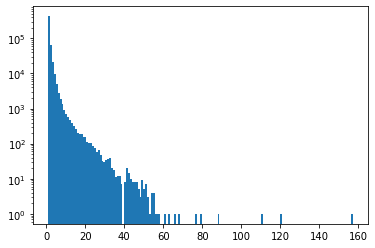

In [7]:
plt.hist(quid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [8]:
quid.value_counts().values

array([157, 120, 111, ...,   1,   1,   1], dtype=int64)

In [4]:
ndf['q5_num_words']=ndf.question1.apply(lambda row: len(row.split(' ')))
ndf['q6_num_words']=ndf.question2.apply(lambda row: len(row.split(' ')))

In [10]:
ndf.head()

,id,qid1,qid2,question1,question2,is_duplicate,q5_num_words,q6_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,5,9


In [5]:
def common_words(text):
    w5=set(map(lambda word:word.lower().strip(),text['question1'].split(' ')))
    w6=set(map(lambda word:word.lower().strip(),text['question2'].split(' ')))
    return len(w5 & w6)

In [6]:
ndf['word_common']=ndf.apply(common_words,axis=1)
ndf.head()

,id,qid1,qid2,question1,question2,is_duplicate,q5_num_words,q6_num_words,word_common
398782,398782,496695,532029,,,1,1,1,1
115086,115086,187729,187730,,,0,1,1,1
327711,327711,454161,454162,,,0,1,1,1
367788,367788,498109,491396,,,0,1,1,1
151235,151235,237843,50930,,,0,1,1,1


In [13]:
list(map(lambda word:word.lower().strip(),'I am poor but I want to invest. What should I do'.split(' ')))

['i',
 'am',
 'poor',
 'but',
 'i',
 'want',
 'to',
 'invest.',
 'what',
 'should',
 'i',
 'do']

In [7]:
def total_word(text):
    w5=set(map(lambda word:word.lower().strip(),text['question1'].split(' ')))
    w6=set(map(lambda word:word.lower().strip(),text['question2'].split(' ')))
    return len(w5) + len(w6)

In [8]:
ndf['total_word']=ndf.apply(total_word,axis=1)
ndf.head()

,id,qid1,qid2,question1,question2,is_duplicate,q5_num_words,q6_num_words,word_common,total_word
398782,398782,496695,532029,,,1,1,1,1,2
115086,115086,187729,187730,,,0,1,1,1,2
327711,327711,454161,454162,,,0,1,1,1,2
367788,367788,498109,491396,,,0,1,1,1,2
151235,151235,237843,50930,,,0,1,1,1,2


In [26]:
ndf['share_percent']=round((ndf.word_common)/(ndf.total_word),2)
ndf.head()

,id,qid1,qid2,question1,question2,is_duplicate,q5_num_words,q6_num_words,word_common,total_word,share_percent
398782,398782,496695,532029,,,1,1,1,1,2,0.5
115086,115086,187729,187730,,,0,1,1,1,2,0.5
327711,327711,454161,454162,,,0,1,1,1,2,0.5
367788,367788,498109,491396,,,0,1,1,1,2,0.5
151235,151235,237843,50930,,,0,1,1,1,2,0.5


In [17]:
import seaborn as sns

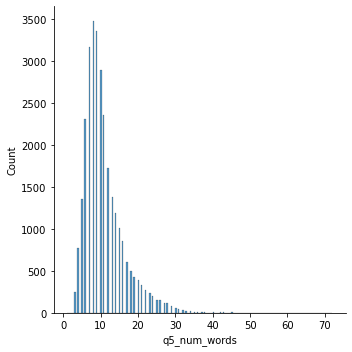

In [18]:
sns.displot(ndf.q5_num_words)

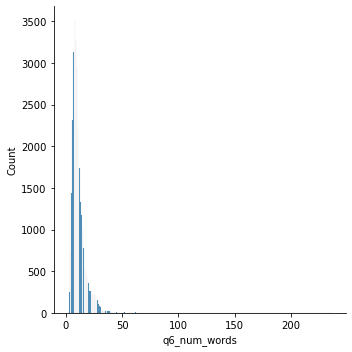

In [19]:
sns.displot(ndf.q6_num_words)

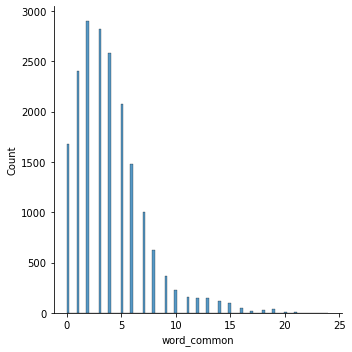

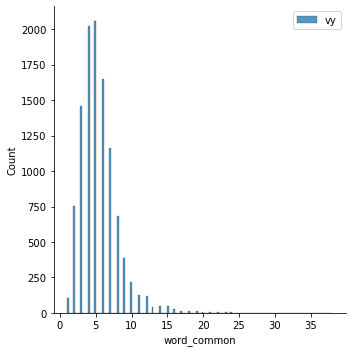

In [20]:
sns.displot(ndf[ndf['is_duplicate']==0]['word_common'],label='vx')
sns.displot(ndf[ndf['is_duplicate']==1]['word_common'],label='vy')
plt.legend()
plt.show()

In [10]:
ques_df=ndf[['question1','question2']]


In [23]:

final_df=ndf.drop(columns=['id','qid1','qid2','question1','question2'])


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2000)
question=list(ques_df.question1)+list(ques_df.question2)
q1_array,q2_array=np.vsplit(cv.fit_transform(question).toarray(),2)

In [37]:
temp_df1=pd.DataFrame(q1_array,index=ques_df.index)
temp_df2=pd.DataFrame(q2_array,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)

In [41]:
final_df5=pd.concat([final_df,temp_df],axis=1)


AttributeError: 'DataFrame' object has no attribute 'ilocc'

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(final_df5.iloc[:,1:].values,final_df5.iloc[:,0].values,test_size=0.2,random_state=1)


In [48]:
final_df5.iloc[:,:].values

array([[ 1., 12., 12., ...,  0.,  0.,  0.],
       [ 0., 12., 15., ...,  0.,  0.,  0.],
       [ 0., 25., 17., ...,  0.,  0.,  0.],
       ...,
       [ 0., 14., 17., ...,  0.,  0.,  0.],
       [ 1., 10., 10., ...,  0.,  0.,  0.],
       [ 1., 15., 14., ...,  0.,  0.,  0.]])

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)


RandomForestClassifier()

In [54]:
y_pred=rf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7681666666666667

In [64]:
preprocessing("I've already! wasn't <b>done</b>?")

'i have was not'

In [44]:
#Advance preprocessing
from nltk.corpus import stopwords
Stop_Words=stopwords.words('english')
def token_feature(row):
        q7=row['question1']
        q8=row['question2']
        
        q7_tok=q7.split()
        q8_tok=q8.split()
        SAFE_DIV = 0.0001 
        Stop_Words=stopwords.words('english')
        token_feat=[0.0]*8
        if len(q7_tok)==0 or len(q8_tok)==0:
             return token_feat
         
        q7_words = set([word for word in q7_tok if word not in Stop_Words])
        q8_words=set([word for word in q7_tok if word not in Stop_Words])
        
        q7_stop=set([word for word in q7_tok if word  in Stop_Words])
        q8_stop=set([word for word in q8_tok if word  in Stop_Words])
        
        common_word=len(q7_words.intersection(q8_words))
        common_stop=len(q7_stop.intersection(q8_stop))
        common_tok=len(set(q7_tok).intersection(set(q8_tok)))
        token_feat[0]=common_word/(min(len(q7_words),len(q8_words))+SAFE_DIV)
        token_feat[1]=common_word/(max(len(q7_words),len(q8_words))+SAFE_DIV)
        token_feat[2]=common_stop/(min(len(q7_stop),len(q8_stop))+SAFE_DIV)
        token_feat[3]=common_stop/(max(len(q7_stop),len(q8_stop))+SAFE_DIV)
        token_feat[4]=common_tok/(min(len(q7_tok),len(q8_tok))+SAFE_DIV)
        token_feat[5]=common_tok/(max(len(q7_tok),len(q8_tok))+SAFE_DIV)
        token_feat[6]=int(q7_tok[-1]==q8_tok[-1])
        token_feat[7]=int(q7_tok[0]==q8_tok[0])
        
        return token_feat,q7_tok

In [47]:
token_features = ndf.apply(token_feature, axis=1)
token_features
ndf['cwc_min']=list(map(lambda x:x[0],token_features))
ndf.cwc_min

398782    0.0
115086    0.0
327711    0.0
367788    0.0
151235    0.0
         ... 
243932    0.0
91980     0.0
266955    0.0
71112     0.0
312470    0.0
Name: cwc_min, Length: 30000, dtype: object

398782    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
115086    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
327711    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
367788    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
151235    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                            ...                   
243932    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
91980     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
266955    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
71112     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
312470    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Length: 30000, dtype: object